In [342]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


        
import seaborn as sns
import matplotlib.pyplot as plt


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boombike-data/day.csv


In [343]:
# Reading the dataset 

boombike = pd.read_csv('/kaggle/input/boombike-data/day.csv')
boombike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [344]:
boombike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [345]:
boombike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### There are no missing values in dataset, so we need not to delete nulls. 

In [346]:
# However we need to drop columns like instant because this is ID or Rownumber having no use for us.
# Also need to drop casual and registered columns because these column will sum up to target 
# variable column cnt.

boombike = boombike.drop(['dteday','instant', 'casual', 'registered'], axis = 1)
boombike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [347]:
# In current dataset we multiple nominal variable that should be mapped to particular categories 
# making dictionary to map these variable, looking at the discription in dictionary

mapping_category = {
           "season": {1: "Spring", 2: "Summer", 3 : "Fall", 4: "Winter"},
           "mnth": {1 : "January", 2: "February",3: "March", 4: "April", 5: "May", 6: "June",
                    7: "July", 8: "August", 9: "September",10: "October",11: "November",12: "December"},
           "weekday": {6 : "Monday", 0: "Tuesday", 1: "Wednesday", 2: "Thursday", 3:"Friday", 4: "Saturday", 5: "Sunday"},
           "weathersit": {1 : "Clear_Cloud", 2 :"Mist_Cloud", 3 : "Light_Snow",4 :"Heavy_Rain"}
}

boom_cat_df = boombike.replace(mapping_category)
boom_cat_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,0,Mist_Cloud,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,0,Mist_Cloud,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear_Cloud,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear_Cloud,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear_Cloud,9.305237,11.46350,43.6957,12.522300,1600


<AxesSubplot:xlabel='yr', ylabel='cnt'>

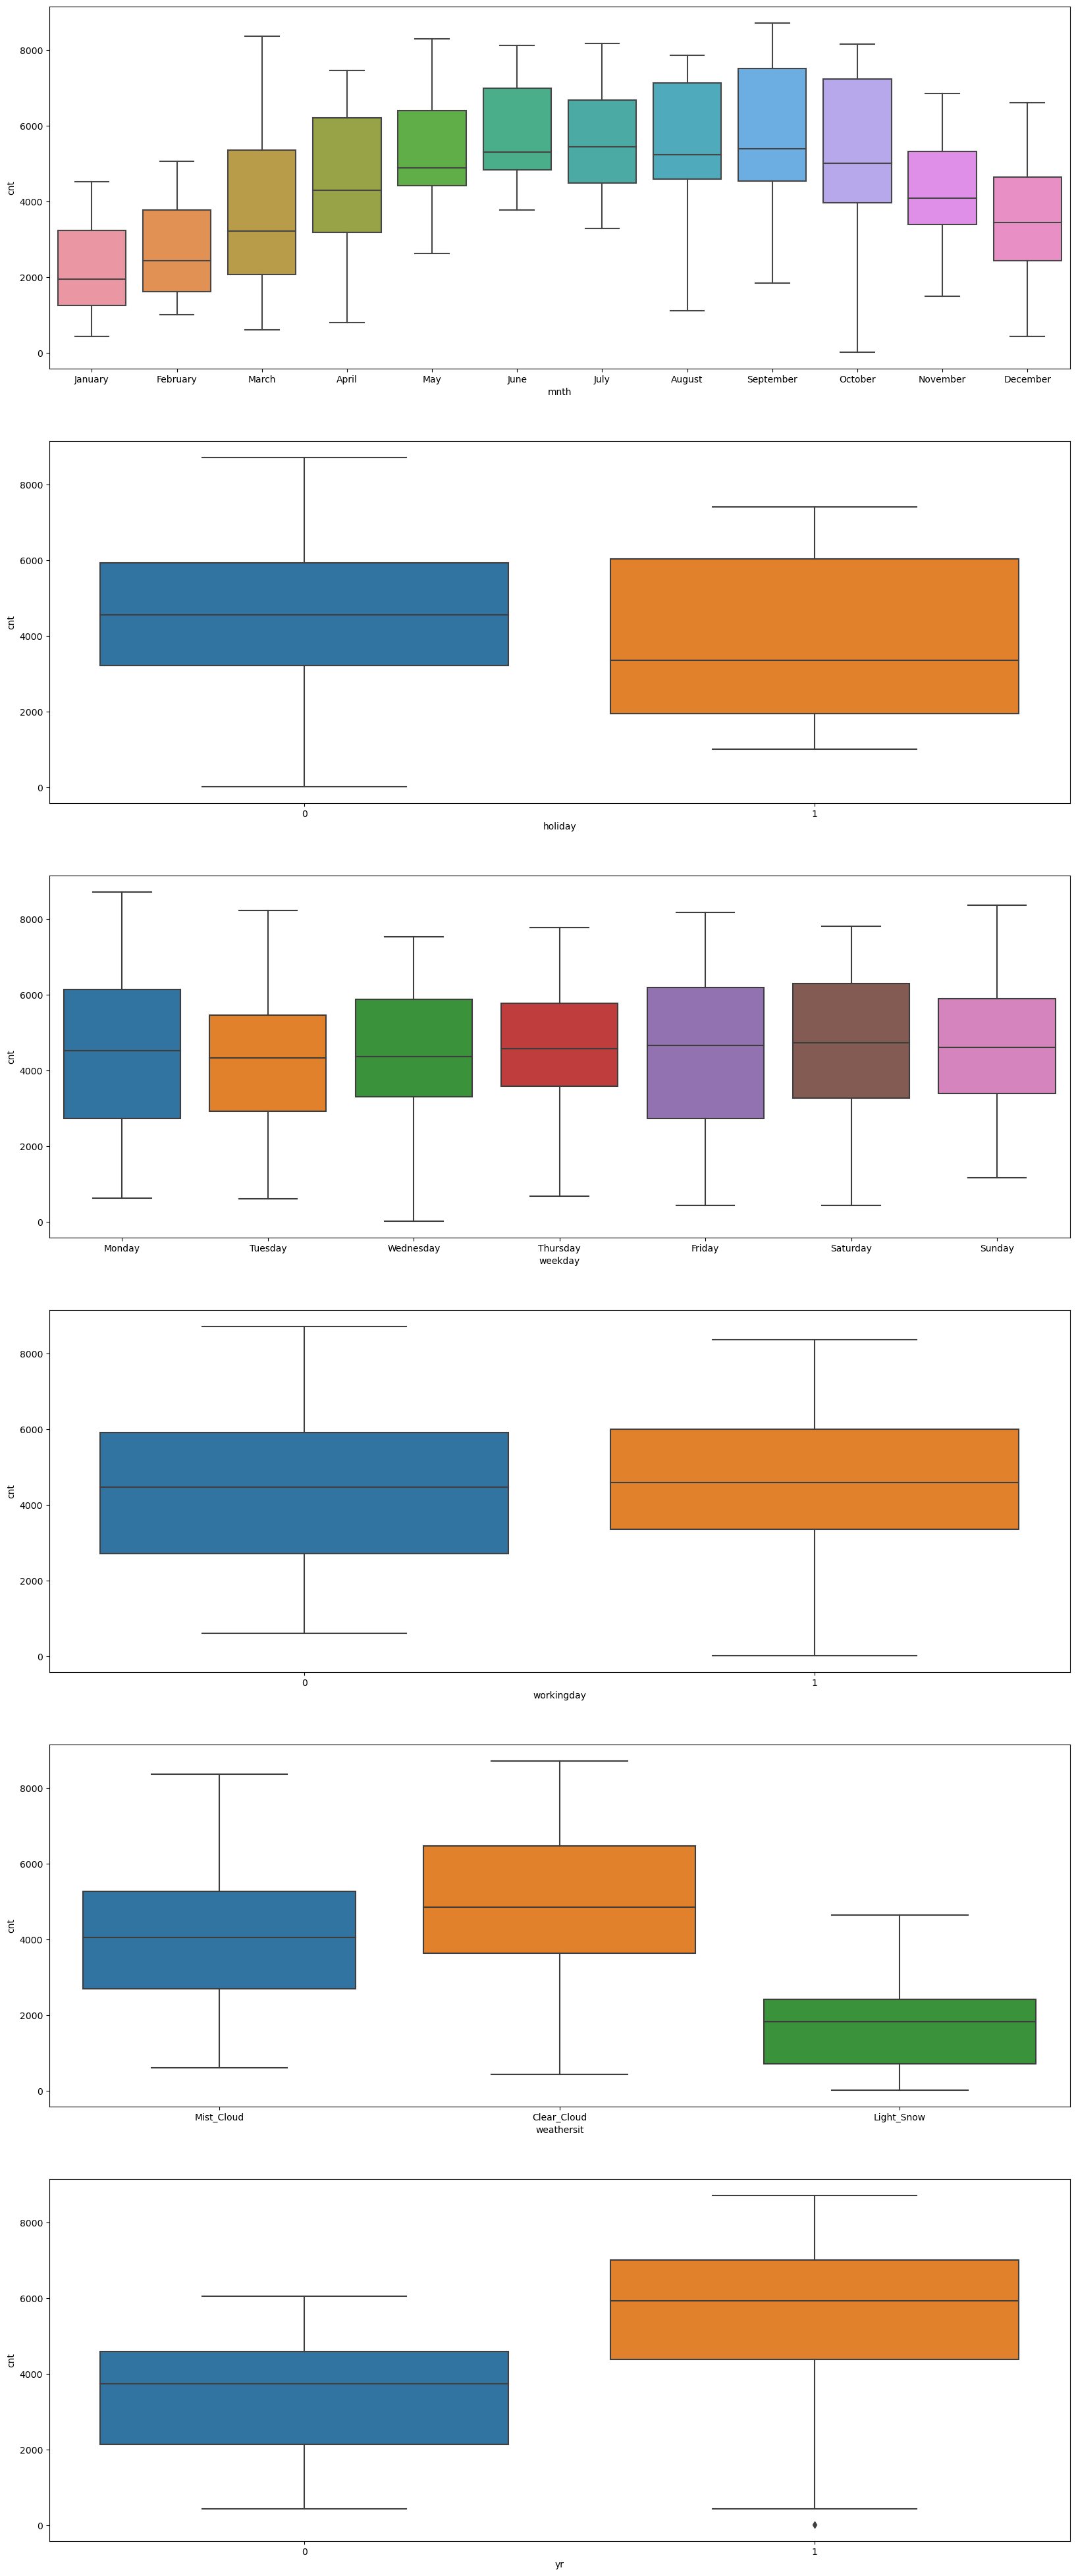

In [348]:
# Now we wanted to looking impact of categorical variable on cnt

# Impact of year
plt.figure(figsize = (20,50))
plt.subplot(6,1,1)
sns.boxplot(x='mnth',y='cnt', data=boom_cat_df)
plt.subplot(6,1,2)
sns.boxplot(x='holiday',y='cnt', data=boom_cat_df)
plt.subplot(6,1,3)
sns.boxplot(x='weekday',y='cnt', data=boom_cat_df)
plt.subplot(6,1,4)
sns.boxplot(x='workingday',y='cnt', data=boom_cat_df)
plt.subplot(6,1,5)
sns.boxplot(x='weathersit',y='cnt', data=boom_cat_df)
plt.subplot(6,1,6)
sns.boxplot(x='yr',y='cnt', data=boom_cat_df)

## Analysis on boxplot shows - 
### 1. In the month of June, july, august and september having most of booking 
### 2. Non-holiday having more booking 
### 3. There is not much difference in booking when we see every day booking data
### 4. When there is clear_clound bookings are more. 
### 5. Year 2019 is having more booking 

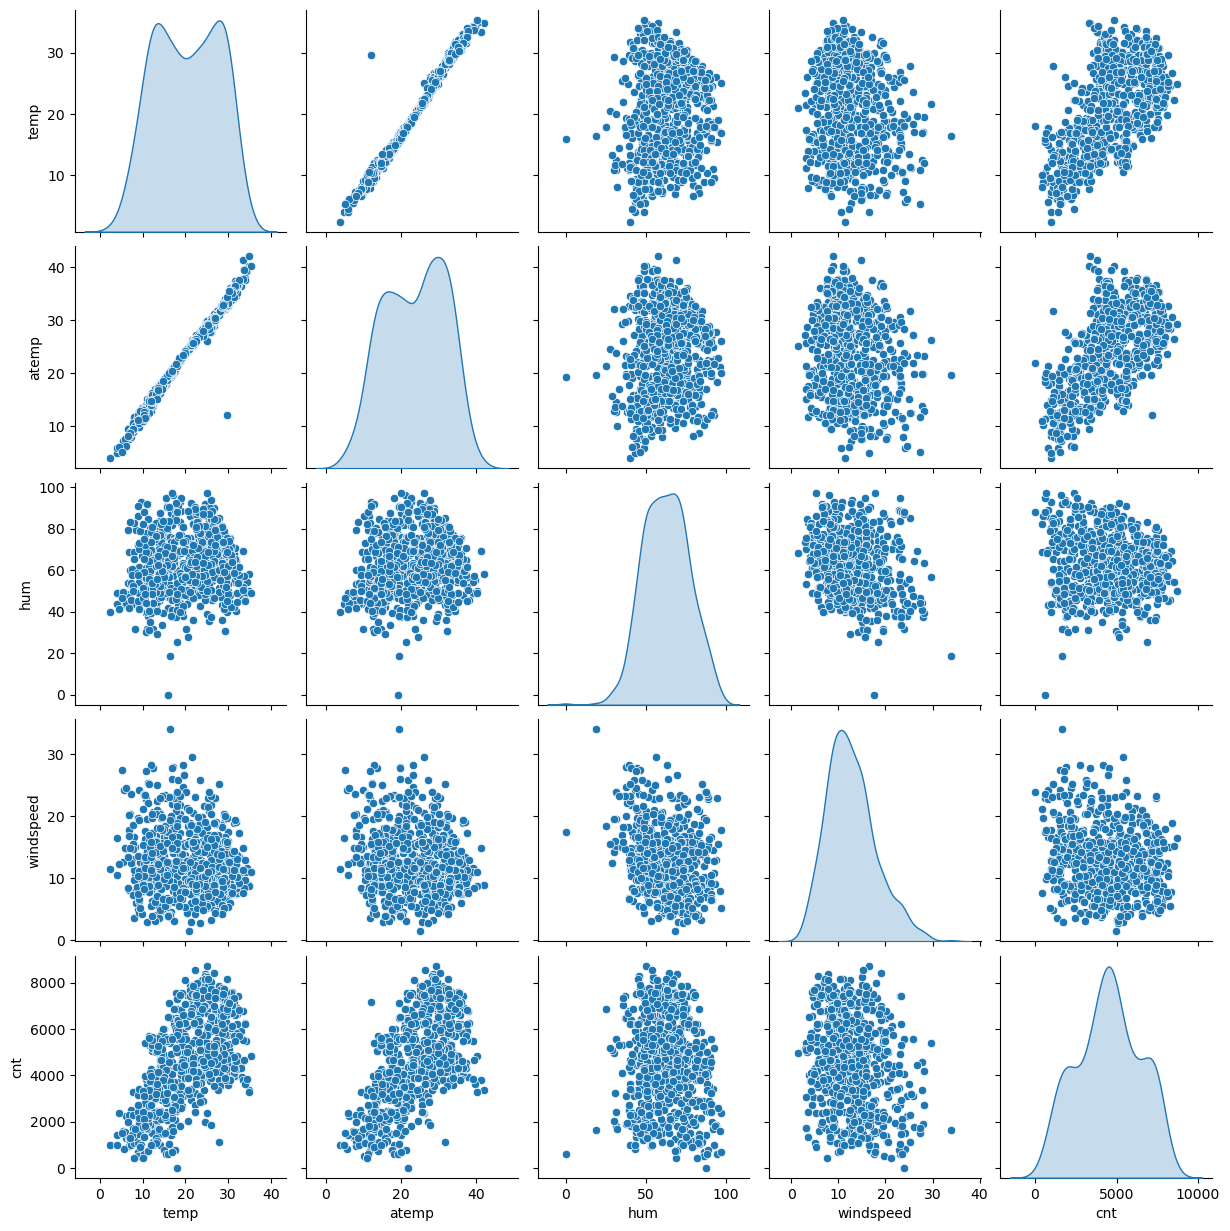

In [396]:
bike_new=boombike[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_new, diag_kind='kde')
plt.show()

# Preparation of data for model

In [349]:
boom_cat_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,0,Mist_Cloud,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,0,Mist_Cloud,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear_Cloud,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear_Cloud,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear_Cloud,9.305237,11.46350,43.6957,12.522300,1600


In [350]:
# Converting categorical variable to dummy variable 

# season category 
season = pd.get_dummies(boom_cat_df['season'], drop_first=True)
boom_refined= pd.concat([boom_cat_df, season], axis=1)

# Also drop the season column as not required
boom_refined = boom_refined.drop(['season'], axis = 1)
boom_refined.head()
#Note : drop_first is used to make it performant as we can do modelling with n-1 variable

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,January,0,Monday,0,Mist_Cloud,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,January,0,Tuesday,0,Mist_Cloud,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,January,0,Wednesday,1,Clear_Cloud,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,January,0,Thursday,1,Clear_Cloud,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,January,0,Friday,1,Clear_Cloud,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [351]:
# month category 
month = pd.get_dummies(boom_refined['mnth'], drop_first=True)
boom_refined= pd.concat([boom_refined, month], axis=1)

# Also drop the mnth column as not required
boom_refined = boom_refined.drop(['mnth'], axis = 1)
boom_refined.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,December,February,January,July,June,March,May,November,October,September
0,0,0,Monday,0,Mist_Cloud,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Tuesday,0,Mist_Cloud,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Wednesday,1,Clear_Cloud,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Thursday,1,Clear_Cloud,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Friday,1,Clear_Cloud,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [352]:
# weather category 
weather = pd.get_dummies(boom_refined['weathersit'], drop_first=True)
boom_refined= pd.concat([boom_refined, weather], axis=1)

# Also drop the weathersit column as not required and also dropping weekday column as not having much impact
boom_refined = boom_refined.drop(['weathersit'], axis = 1)

boom_refined.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Spring,...,January,July,June,March,May,November,October,September,Light_Snow,Mist_Cloud
0,0,0,Monday,0,14.110847,18.18125,80.5833,10.749882,985,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,Tuesday,0,14.902598,17.68695,69.6087,16.652113,801,1,...,1,0,0,0,0,0,0,0,0,1
2,0,0,Wednesday,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,Thursday,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,Friday,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,1,0,0,0,0,0,0,0,0,0


In [353]:
# weather category 
weekday = pd.get_dummies(boom_refined['weekday'], drop_first=True)
boom_refined= pd.concat([boom_refined, weekday], axis=1)

# Also drop the weathersit column as not required and also dropping weekday column as not having much impact
boom_refined = boom_refined.drop(['weekday'], axis = 1)

boom_refined.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Light_Snow,Mist_Cloud,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## Train and split data

In [354]:
df_train, df_test = train_test_split(boom_refined, train_size=0.7, random_state = 100)
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Light_Snow,Mist_Cloud,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,1,0,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,1,0,0,0,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,1,0,0,1,0,0,0


In [355]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          220 non-null    int64  
 1   holiday     220 non-null    int64  
 2   workingday  220 non-null    int64  
 3   temp        220 non-null    float64
 4   atemp       220 non-null    float64
 5   hum         220 non-null    float64
 6   windspeed   220 non-null    float64
 7   cnt         220 non-null    int64  
 8   Spring      220 non-null    uint8  
 9   Summer      220 non-null    uint8  
 10  Winter      220 non-null    uint8  
 11  August      220 non-null    uint8  
 12  December    220 non-null    uint8  
 13  February    220 non-null    uint8  
 14  January     220 non-null    uint8  
 15  July        220 non-null    uint8  
 16  June        220 non-null    uint8  
 17  March       220 non-null    uint8  
 18  May         220 non-null    uint8  
 19  November    220 non-null   

In [356]:
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Light_Snow,Mist_Cloud,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,1,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,1,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,1,0,0,1,0,0,0


<AxesSubplot:>

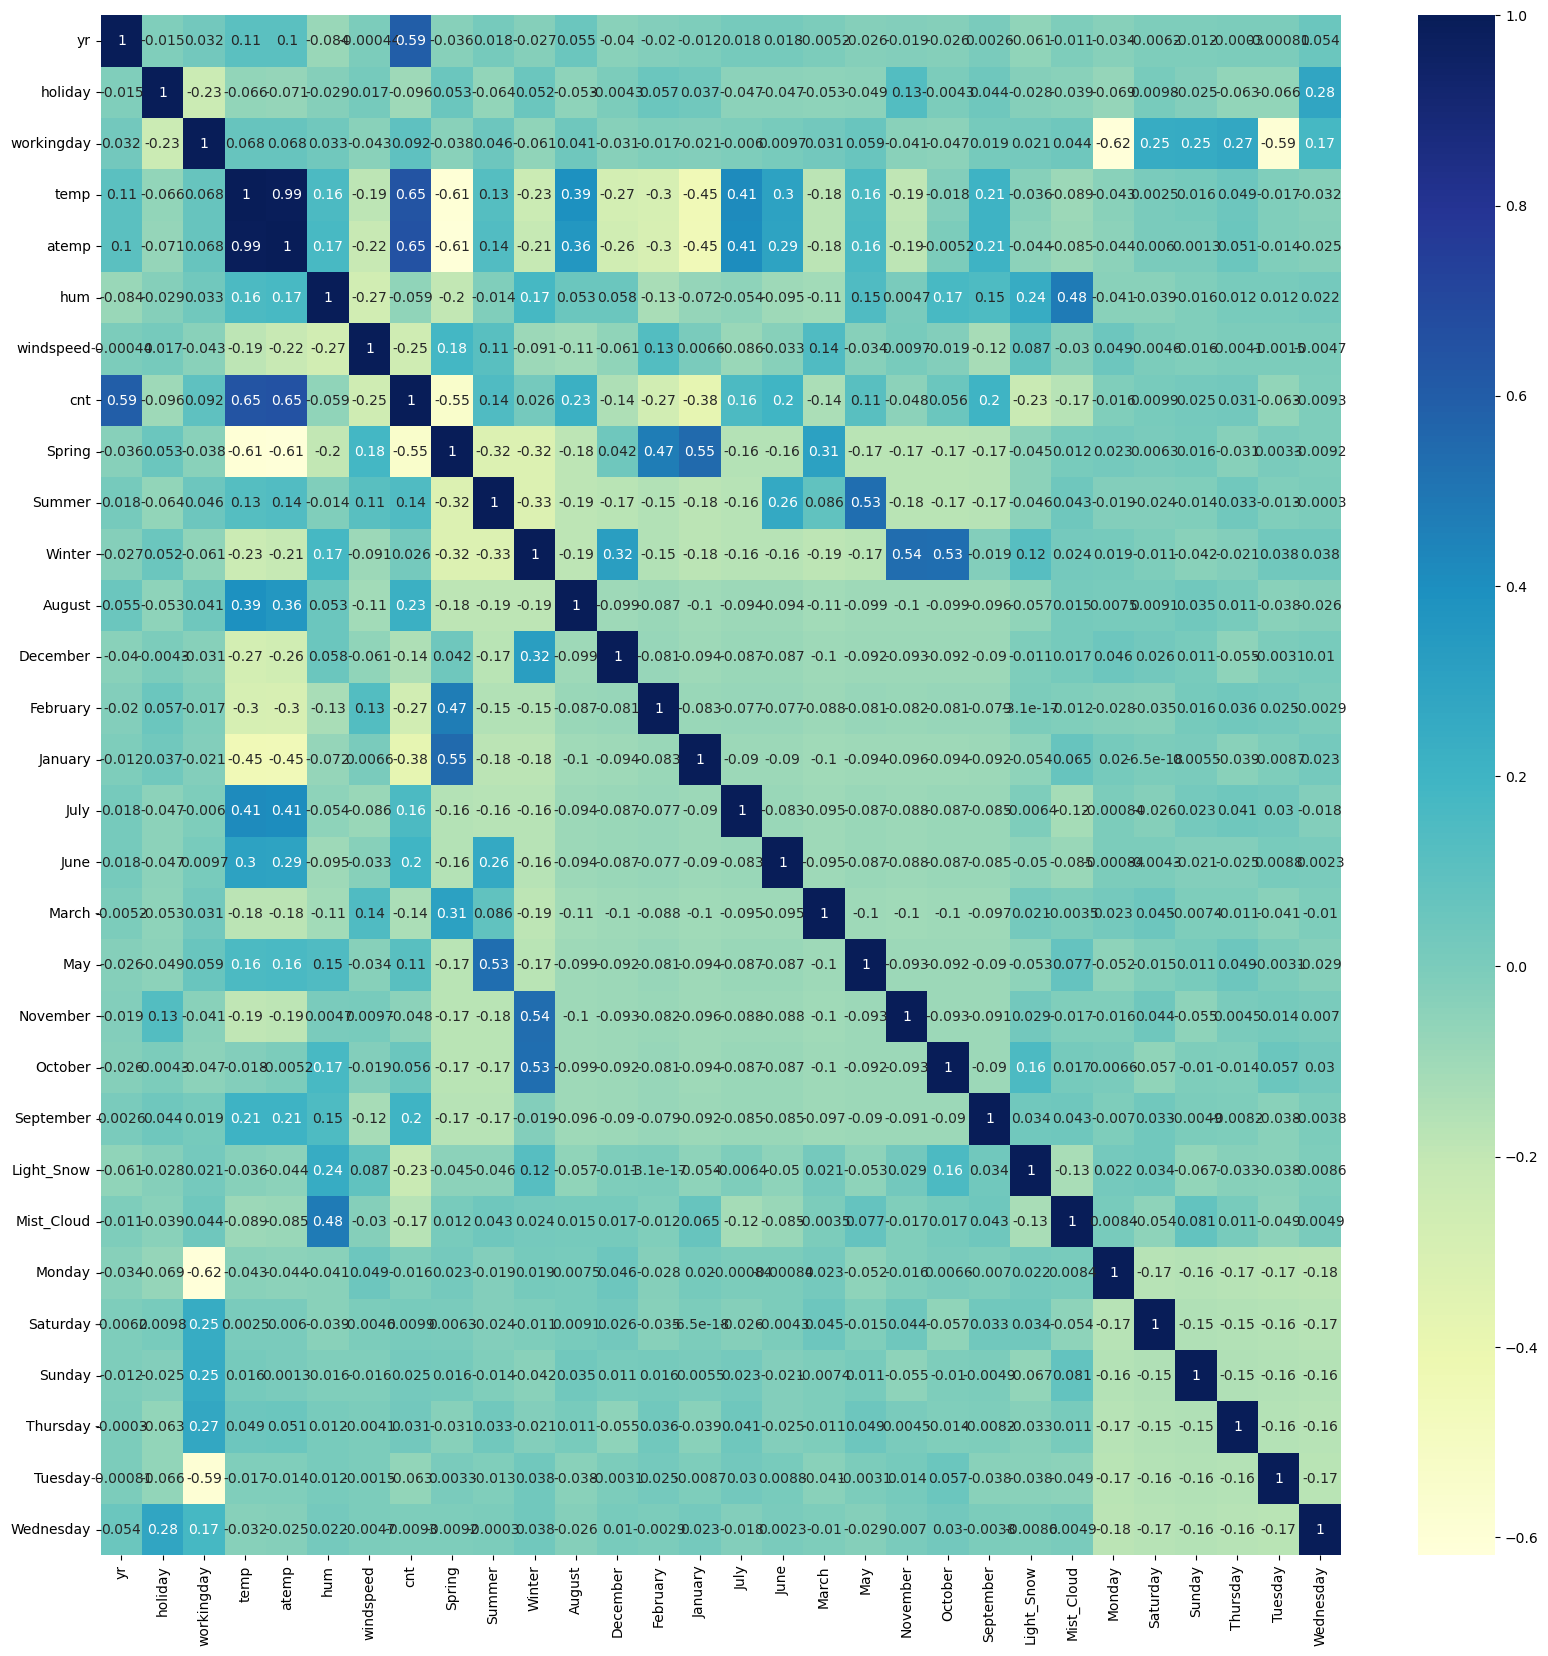

In [357]:
# heat map 
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), annot=True, cmap = 'YlGnBu')


In [358]:
# x train and y train 

y_train = df_train.pop('cnt')
X_train = df_train

print(y_train)
print(X_train)

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64
     yr  holiday  workingday      temp     atemp       hum  windspeed  Spring  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686       0   
426   1        0           0  0.442393  0.438975  0.640189   0.255342       1   
728   1        0           0  0.245101  0.200348  0.498067   0.663106       1   
482   1        0           0  0.395666  0.391735  0.504508   0.188475       0   
111   0        0           1  0.345824  0.318819  0.751824   0.380981       0   
..   ..      ...         ...       ...       ...       ...        ...     ...   
578   1        0           1  0.863973  0.824359  0.679690   0.187140       0   
53    0        0           1  0.202618  0.218747  0.435939   0.111379       1   
350   0        0           0  0.248216  0.223544  0.5779

In [359]:
# using RFE for linear regression 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [360]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)


In [361]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', False, 8),
 ('December', False, 4),
 ('February', False, 5),
 ('January', False, 2),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 16),
 ('May', False, 7),
 ('November', False, 3),
 ('October', False, 13),
 ('September', True, 1),
 ('Light_Snow', True, 1),
 ('Mist_Cloud', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 15),
 ('Sunday', False, 12),
 ('Thursday', False, 11),
 ('Tuesday', False, 9),
 ('Wednesday', False, 10)]

In [362]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'July', 'September', 'Light_Snow', 'Mist_Cloud',
       'Monday'],
      dtype='object')

In [363]:
# Just to see which feature rfe is not supporting 
X_train.columns[~rfe.support_]

Index(['atemp', 'August', 'December', 'February', 'January', 'June', 'March',
       'May', 'November', 'October', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

In [364]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building model using statsmodel detail statistics

In [365]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [366]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [367]:
#Summary of linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          2.11e-191
Time:                        19:32:35   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2402      0.036      6.714      0.0

In [368]:
# calculate the VIF values for this model 
# import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor



## Model 1 VIF check

In [369]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.35
7,Spring,5.02
4,temp,3.62
9,Winter,3.49
8,Summer,2.62
5,hum,1.91
3,workingday,1.88
14,Monday,1.78
13,Mist_Cloud,1.57
10,July,1.49


In [370]:
#drop spring due to high VIF value 

X_train_new = X_train_rfe.drop(["Spring"], axis = 1)

## Model 2 VIF check

In [371]:
X_train_m2 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_m2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.6
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          5.23e-191
Time:                        19:32:35   Log-Likelihood:                 513.89
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     496   BIC:                            -940.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1822      0.029      6.331      0.0

In [372]:
vif = pd.DataFrame()
vif['Features'] = X_train_m2.columns
vif['VIF'] = [variance_inflation_factor(X_train_m2.values, i) for i in range(X_train_m2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.62
3,workingday,1.88
5,hum,1.88
13,Monday,1.78
4,temp,1.60
12,Mist_Cloud,1.56
9,July,1.43
7,Summer,1.33
8,Winter,1.29
11,Light_Snow,1.24


In [373]:
X_train_m3 = X_train_m2.drop(["holiday"], axis = 1)

## Model 3 VIF checks

In [374]:
X_train_m3 = sm.add_constant(X_train_m3)
lm = sm.OLS(y_train, X_train_m3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          4.14e-191
Time:                        19:32:35   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1712      0.028      6.014      0.0

In [375]:
vif = pd.DataFrame()
vif['Features'] = X_train_m3.columns
vif['VIF'] = [variance_inflation_factor(X_train_m3.values, i) for i in range(X_train_m3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.11
4,hum,1.88
2,workingday,1.65
12,Monday,1.64
3,temp,1.60
11,Mist_Cloud,1.56
8,July,1.43
6,Summer,1.33
7,Winter,1.29
10,Light_Snow,1.24


In [376]:
X_train_m4 = X_train_m3.drop(["hum"], axis = 1)

In [377]:
X_train_m4 = sm.add_constant(X_train_m4)
lm = sm.OLS(y_train, X_train_m4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.8
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          6.72e-188
Time:                        19:32:35   Log-Likelihood:                 500.87
No. Observations:                 510   AIC:                            -977.7
Df Residuals:                     498   BIC:                            -926.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0717      0.019      3.849      0.0

In [378]:
vif = pd.DataFrame()
vif['Features'] = X_train_m4.columns
vif['VIF'] = [variance_inflation_factor(X_train_m4.values, i) for i in range(X_train_m4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,21.03
2,workingday,1.65
11,Monday,1.63
3,temp,1.50
7,July,1.42
5,Summer,1.33
6,Winter,1.25
8,September,1.18
4,windspeed,1.09
9,Light_Snow,1.05


In [379]:
X_train_m5 = X_train_m4.drop(["July"], axis = 1)

In [380]:
X_train_m5 = sm.add_constant(X_train_m5)
lm = sm.OLS(y_train, X_train_m5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          3.13e-188
Time:                        19:32:35   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0750      0.019      4.031      0.0

In [381]:
vif = pd.DataFrame()
vif['Features'] = X_train_m5.columns
vif['VIF'] = [variance_inflation_factor(X_train_m5.values, i) for i in range(X_train_m5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.86
2,workingday,1.65
10,Monday,1.63
6,Winter,1.21
3,temp,1.20
5,Summer,1.19
7,September,1.10
4,windspeed,1.09
8,Light_Snow,1.05
9,Mist_Cloud,1.04


### This model looks good, so this is our final model. looking at coeficients, p value and VIF 

# Residual analysis on trained model

In [382]:
y_train_pred = lm.predict(X_train_m5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


Text(0.5, 0, 'Errors')

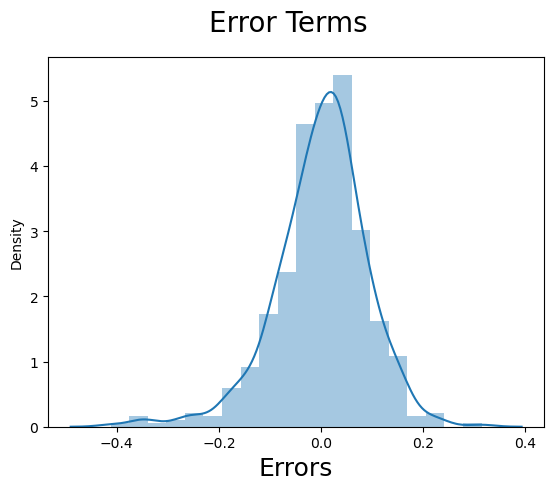

In [383]:
fig = plt.figure()
sns.distplot(y_train - y_train_pred, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

###  This looks good 

## Preparing test set for model and doing final prediction

In [385]:
y_test = df_test.pop('cnt')
X_test = df_test

In [386]:
X_test_new = X_test[X_train_m5.columns.difference(['const'])]
X_test_new = sm.add_constant(X_test_new)



In [387]:
X_test_new.shape

(220, 11)

In [388]:
X_train_new.shape

(510, 14)

In [389]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

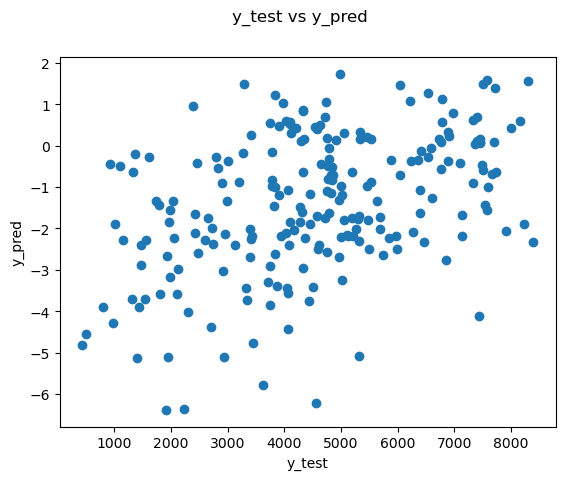

In [390]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [394]:
print('R- Sqaured train: ', round(lm.rsquared,2), '  Adj. R-Squared train:', round(lm.rsquared_adj,3) )


# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm.params,3))

R- Sqaured train:  0.84   Adj. R-Squared train: 0.832

Coefficent for the variables are:
const         0.075
yr            0.233
workingday    0.056
temp          0.550
windspeed    -0.155
Summer        0.089
Winter        0.131
September     0.097
Light_Snow   -0.287
Mist_Cloud   -0.080
Monday        0.068
dtype: float64


## R^2 Test

In [395]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-5.760360153488983